In [11]:
#import libraries and a plotting function
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import random
from collections import deque
sns.set_style('white')
%matplotlib inline

## A hand-crafted G(n,p) model. Note the use of a random sampling function

In [12]:
def Gnp(num_nodes,p):
    Gr=nx.Graph()
    Gr.add_nodes_from(range(1,num_nodes+1)) 
    for i in range(1,num_nodes+1):
        for j in range(i+1,num_nodes+1):
            if (np.random.rand() < p):
                Gr.add_edge(i,j) #
    return Gr

## Examples

In [13]:
G=Gnp(20,0.6)

In [14]:
# Network statistics
degree=list(dict(nx.degree(G)).values())
print ('#nodes: %i' % G.number_of_nodes())
print ('#links: %i' % G.number_of_edges())
print ('Average degree: %0.4f' % np.mean(degree))
print ('Max degree: %i' % np.max(degree))
print ('Min degree: %i' % np.min(degree))
print ('Average Clustering: %0.4f' % nx.average_clustering(G))

#nodes: 20
#links: 108
Average degree: 10.8000
Max degree: 15
Min degree: 8
Average Clustering: 0.5360


/Users/johanneswachs/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Degree distribution')

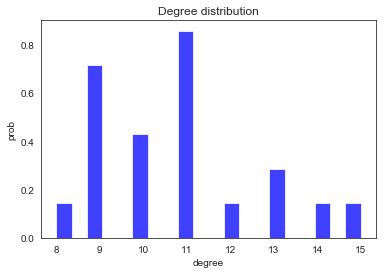

In [15]:
# Degree distribution
n, bins, patches= plt.hist(degree,20, normed=True, facecolor='blue', alpha=0.75);
plt.xlabel('degree')
plt.ylabel('prob')
plt.title('Degree distribution')

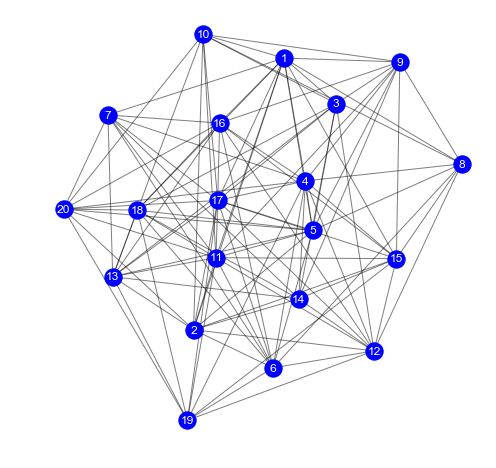

In [16]:
#Plot
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="blue");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="white");
plt.show();

## Simulate larger networks (n= 100,500, 1000) and plot their degree distribution. Pick a p so that the average degree is 5.

In [150]:
# your code here

## Now use the function np.random.poisson to generate 1000 draws from the Poisson distribution with mean 5.

In [154]:
?np.random.poisson

In [155]:
#your code here

### Are the two distributions similar?

---------

## NetworkX of course has an implementation of ER graphs

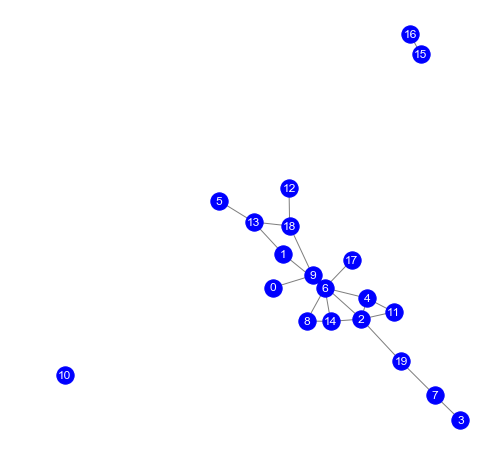

In [17]:
ER2 = nx.erdos_renyi_graph(20,.1)
#Plot
pos = nx.fruchterman_reingold_layout(ER2);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(ER2, pos, node_size=300, node_color="blue");
nx.draw_networkx_edges(ER2, pos, alpha=0.500);
nx.draw_networkx_labels(ER2, pos, font_color="white");
plt.show();

## Let us check the ER phase transition computationally.

In [40]:
#this may take a moment!
sizes = []
for p in np.linspace(0,.1,250):
    gg = nx.erdos_renyi_graph(1000,p)
    #extract the giant connected component
    size_g_comp = sorted([len(x) for x in nx.connected_components(gg)],reverse=True)[0]
    sizes.append(size_g_comp)

In [41]:
sizes_scaled = [x/1000 for x in sizes]

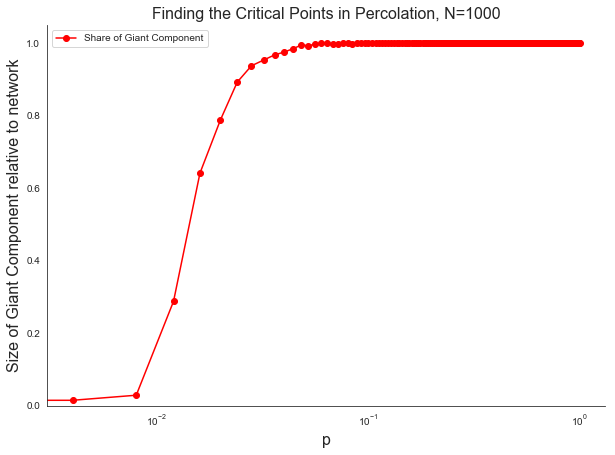

In [139]:
fig = plt.figure(figsize=(10,7))
plt.plot(np.linspace(0,1,250),sizes_scaled, '-o',color='red',label='Share of Giant Component')
plt.xscale('log')
plt.xlabel('p', fontsize=16)
plt.ylabel('Size of Giant Component relative to network', fontsize=16)
plt.title('Finding the Critical Points in Percolation, N=1000',fontsize=16)
sns.despine()

plt.legend()
plt.ylim([0,1.05])
plt.show()

# Watts-Strogatz

In [43]:
N = 50
k = 4 # average degree
p = 0.3 #probability of rewiring

In [44]:
G=nx.watts_strogatz_graph(N, k, p)

In [45]:
# Network statistics
degree=list(dict(nx.degree(G)).values())
print ('#nodes: %i' % G.number_of_nodes())
print ('#links: %i' % G.number_of_edges())
print ('Average degree: %0.4f' % np.mean(degree))
print ('Max degree: %i' % np.max(degree))
print ('Min degree: %i' % np.min(degree))
print ('Average Clustering: %0.4f' % nx.average_clustering(G))
print ('Average shortest path length: %3.4f' % nx.average_shortest_path_length(G))

#nodes: 50
#links: 100
Average degree: 4.0000
Max degree: 6
Min degree: 2
Average Clustering: 0.2087
Average shortest path length: 3.2196


/Users/johanneswachs/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Degree distribution')

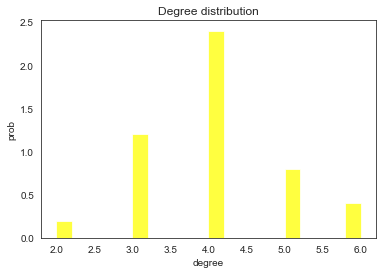

In [46]:
# Degree distribution
n, bins, patches= plt.hist(degree,20, normed=True, facecolor='yellow', alpha=0.75);
plt.xlabel('degree')
plt.ylabel('prob')
plt.title('Degree distribution')

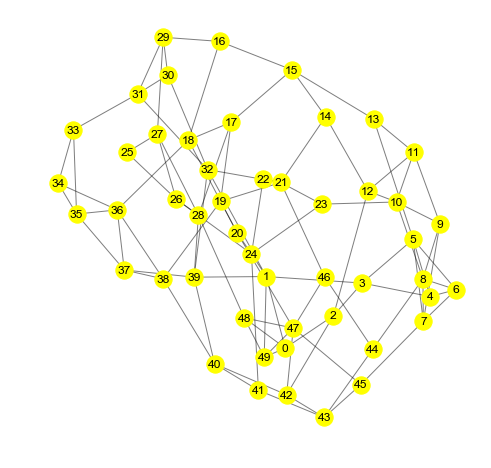

In [47]:
#Plot
pos = nx.fruchterman_reingold_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="yellow");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="black");
plt.show();

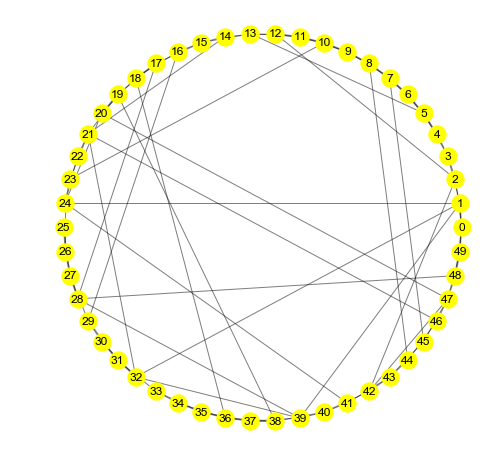

In [48]:
#circular layout
pos = nx.circular_layout(G);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="yellow");
nx.draw_networkx_edges(G, pos, alpha=0.500);
nx.draw_networkx_labels(G, pos, font_color="black");
plt.show();

## Let's draw the diagram comparing path lengths and clustering as rewiring varies

In [186]:
N= 500 #(500 nodes)
k= 4 #connected to 4 neighbors on each side
diameter = []
clustering = []
for p in [.001,.005,.01,.02,.1,1]:
    G=nx.watts_strogatz_graph(N, k, p)  
    diameter.append(nx.diameter(G))
    clustering.append(np.mean(list(nx.clustering(G).values())))

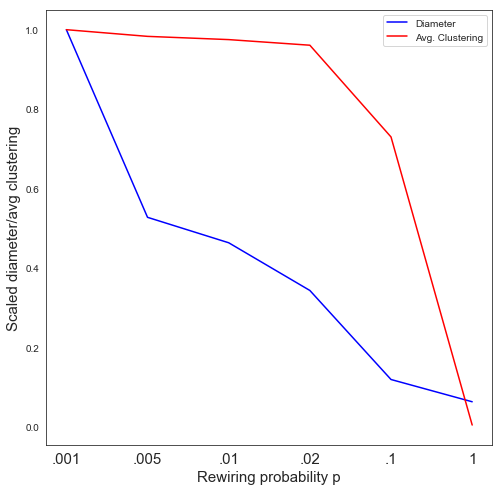

In [192]:
fig= plt.figure(figsize=(8,8))
plt.plot([x/max(diameter) for x in diameter],label='Diameter',color='Blue')
plt.plot([x/max(clustering) for x in clustering],label='Avg. Clustering',color='Red')
plt.xlabel('Rewiring probability p',size=15)
plt.ylabel('Scaled diameter/avg clustering',size=15)
plt.xticks([0,1,2,3,4,5])
fig.axes[0].set_xticklabels(['.001','.005','.01','.02','.1','1'],size=15)
plt.legend()

## Configuration Model

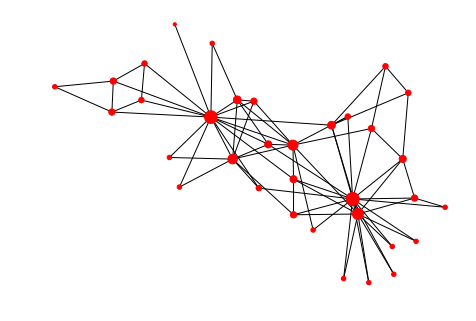

In [53]:
#let's continue with the karate graph
G=nx.karate_club_graph()
d = dict(G.degree())
pos=nx.nx.fruchterman_reingold_layout(G)
nx.draw(G, node_size=[v * 10 for v in d.values()], pos = pos)
plt.show()

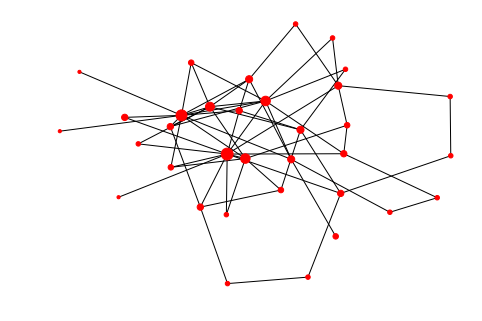

In [58]:
karate_config=nx.configuration_model(d.values(),create_using=nx.Graph)
d2 = dict(karate_config.degree())
pos=nx.nx.fruchterman_reingold_layout(karate_config)
nx.draw(karate_config, node_size=[v * 10 for v in d2.values()], pos = pos)
plt.show()

## Let's see what the configuration model doesn't pick up - is the distribution of closeness centrality the same?

In [65]:
karate_closeness=nx.closeness_centrality(G)

Text(0.5,0,'Node')

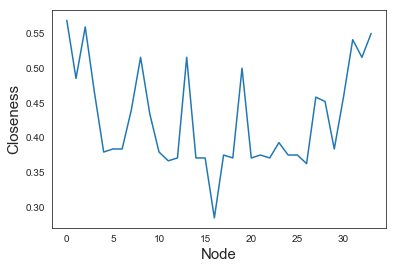

In [69]:
plt.plot(karate_closeness.values())
plt.ylabel('Closeness',size=15)
plt.xlabel('Node',size=15)

In [94]:
simulated_closeness_scores = {node:[] for node in G.nodes()}
for x in range(100):
    karate_config=nx.configuration_model(d.values(),create_using=nx.Graph)
    simulated_closeness = nx.closeness_centrality(karate_config)
    for node,closeness_score in simulated_closeness.items():
        simulated_closeness_scores[node].append(closeness_score)
avg_simulated_closeness = {node:np.mean(scores) for node,scores in simulated_closeness_scores.items()}        

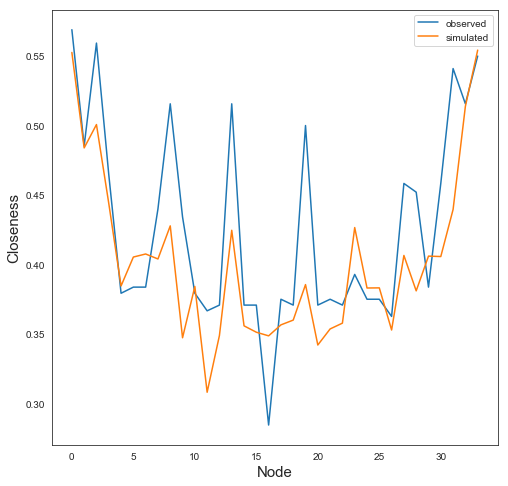

In [100]:
plt.figure(figsize=(8,8))
plt.plot(karate_closeness.values(),label='observed')
plt.plot(avg_simulated_closeness.values(),label='simulated')
plt.ylabel('Closeness',size=15)
plt.xlabel('Node',size=15)
plt.legend()

## There are some nodes that are significantly more important according to the metric of closeness centrality than suggested by the configuration model

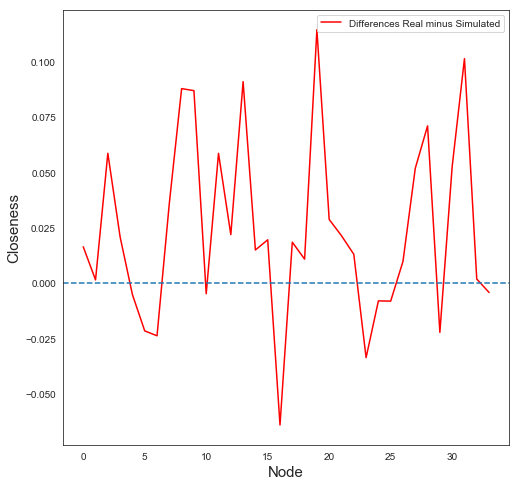

In [107]:
differences = {}

for node in karate_closeness:
    differences[node]=karate_closeness[node]-avg_simulated_closeness[node]

plt.figure(figsize=(8,8))
plt.plot(differences.values(),label='Differences Real minus Simulated',color='red')
plt.axhline(0,linestyle='--')
plt.ylabel('Closeness',size=15)
plt.xlabel('Node',size=15)
plt.legend()

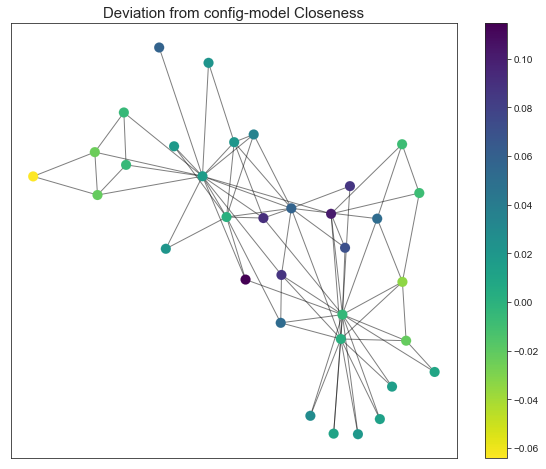

In [138]:
plt.figure(figsize=(10,8))
pos=nx.fruchterman_reingold_layout(G)
nc=nx.draw_networkx_nodes(G, node_size=100, linewidths=.1,
                          pos = pos,node_color=list(differences.values()),cmap = 'viridis_r')
edges = nx.draw_networkx_edges(G, pos = pos,alpha=.5)
plt.colorbar(nc)
plt.title('Deviation from config-model Closeness',size=15)
plt.xticks([])
plt.yticks([])
plt.show()

## Try out other node level measures!